In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

##  Q1.  Part 1
### (a) Grafting harry (fg.jpg) on bg.jpg
    
1. We read the image that we need to mask out.
2. We mask out the green region using the function inRange. We decide the values of lower limit and upper limit based on the green screen color used. <br>
`mask = cv2.inRange(image_copy, lower_g, upper_g)`
3. we create a mask of harry by deleting the green region we just carved from the original image.<br>
`masked_image[mask != 0] = [0, 0, 0]`
4. We then resize our background (or foreground) to match the mask.
5. Now we carve out the mask shape from the background so we can add our foreground there.<br>
`crop_background[mask == 0] = [0, 0, 0]`
6. We combine the foreground and the background and plot the output.

<I> Note : the mask here is empty in the 

(210, 567, 3)


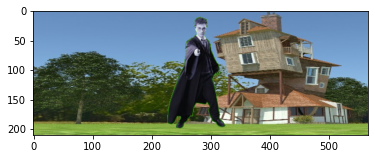

In [2]:
fg = cv2.imread("../images/fg.jpg",cv2.IMREAD_UNCHANGED)
image_copy = fg

#mask out the fg
lower_g = np.array([0, 150, 0])     ##[R value, G value, B value]
upper_g = np.array([150, 255, 150 ])
mask = cv2.inRange(image_copy, lower_g, upper_g)
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

#resize or crop bg
print(fg.shape)
background_image = cv2.imread('../images/bg.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = cv2.resize(background_image, ( 567 ,210))

#carve out pixels from bg in the shape of mask
crop_background[mask == 0] = [0, 0, 0]

#add both
final_image = crop_background + masked_image
plt.imshow(final_image)

### (b) Grafting harry on Hogwards


525 700 3


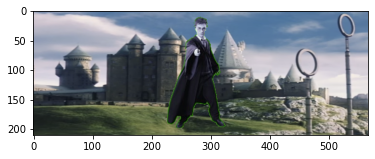

In [3]:
background_image = cv2.imread('../images/hogwards.png')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = cv2.resize(background_image, ( 567 ,210))
h,w,c = background_image.shape
print(h,w,c)
crop_background[mask == 0] = [0, 0, 0]

#add both
final_image = crop_background + masked_image
plt.imshow(final_image)

### (c) Harry on different images
1.  Harry at hogwards in night
2. doggo at taj mahal
3. doggo with bg
4. Harry at taj


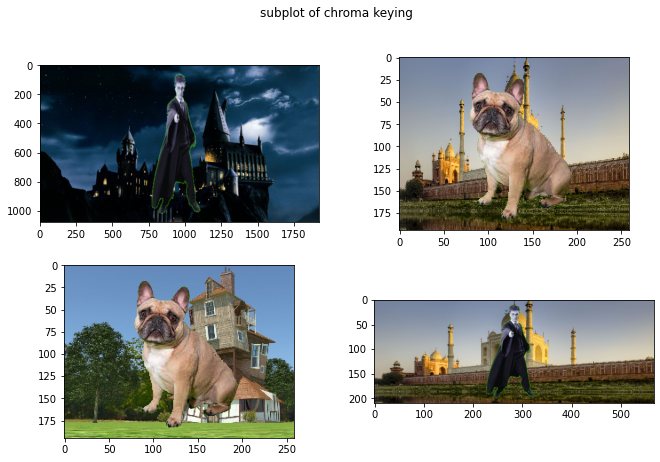

In [4]:
fg2 = cv2.imread("../images/doggo.jpeg",cv2.IMREAD_UNCHANGED)
fg2 = cv2.cvtColor(fg2,cv2.COLOR_BGR2RGB)
image_copy = fg2

#mask out the fg
lower_g = np.array([0, 150, 0])     ##[R value, G value, B value]
upper_g = np.array([150, 255, 150 ])
mask3 = cv2.inRange(image_copy, lower_g, upper_g)
masked_image3 = np.copy(image_copy)
masked_image3[mask3 != 0] = [0, 0, 0]

bg2 = cv2.imread('../images/taj.jpg')
bg2 = cv2.cvtColor(bg2,cv2.COLOR_BGR2RGB)
bg2 = cv2.resize(bg2, ( 259 ,195)) 
bg2[mask3 == 0] = [0, 0, 0]
img2 = masked_image3 + bg2

bg2 = cv2.imread('../images/bg.jpg')
bg2 = cv2.cvtColor(bg2,cv2.COLOR_BGR2RGB)
bg2 = cv2.resize(bg2, ( 259 ,195)) 
bg2[mask3 == 0] = [0, 0, 0]
img3 = masked_image3 + bg2

bg2 = cv2.imread('../images/taj.jpg')
bg2 = cv2.cvtColor(bg2,cv2.COLOR_BGR2RGB)
bg2 = cv2.resize(bg2, ( 567 ,210)) 
bg2[mask == 0] = [0, 0, 0]
img4 = masked_image + bg2

bg = cv2.imread('../images/night.jpg')
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
harry = cv2.resize(masked_image, ( 1920 ,1080))
mask2 = cv2.resize(mask, ( 1920 ,1080))
bg[mask2 == 0] = [0, 0, 0]#stretched harry instead of background
img1 = harry + bg

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(11, 7))
fig.suptitle('subplot of chroma keying')
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

## 

## Part 2

Assuming there is no compression we know the size of one image would be :<br>
`720 x 576 = 414720 pixels`<br>
 Standard displays are 8 bit 3 channels that means ,
<br>
`414720 x 8 x 3 = 9953280 bits`<br>
Which is approximately 9.49 Mega Bits, now for how many images,<br>
`(2 x 1024 x 8) / 9.49 = 1726.44 `<br>
So , we can store 1726 images.

## Q2.
Assuming the photos are 8 bit and have 3 channels. We know that each image can have a maximum size of :<br>
`( 500 x 8 )/ 200 = 20`<br>
20 mega megabit per image. That would mean each image can have maximum of , <br>
`(20 x 1024 x 1024) / (8 x 3) = 873813 Pixels`<br>
Conosidering it is a square , <br>
 $\sqrt{873813}$ = `934` <br> 
Hence we can have 200 934 x 934 8bit images.




## Q3.
We know that tghe camera has a lens with a particular focal length that creates images on the sensor. We know the height of the creature on the sensor is 390 pixels ,and each pixel is : <br>
`10/1024 mm` in size,  that is <br>
`390 x 10/1024 = 3.8` milimeters is the size of creature on the sensor.<br>
The ratio of its size on sensor with the distance from lens is should be equal to the ratio of its actual size and distance from lens. (property of lens) <br>
`3.8 / 435 = (Actual size) / 240000  ` <br>
`Actual size = 2101.3` milimeters or `210.1` cm.


## Q4.
### Part 1


In [5]:
def bitQuantizeImage(im,k):
    ran = (2**k) 
    img = []
    for i in range(im.shape[0]):
        img.append([])
        for j in range(im.shape[1]):
            img[i].append(0)
            img[i][j] = math.floor((im[i][j])/pow(2,8-k))
    img = np.array(img)
    return img

### Part 2

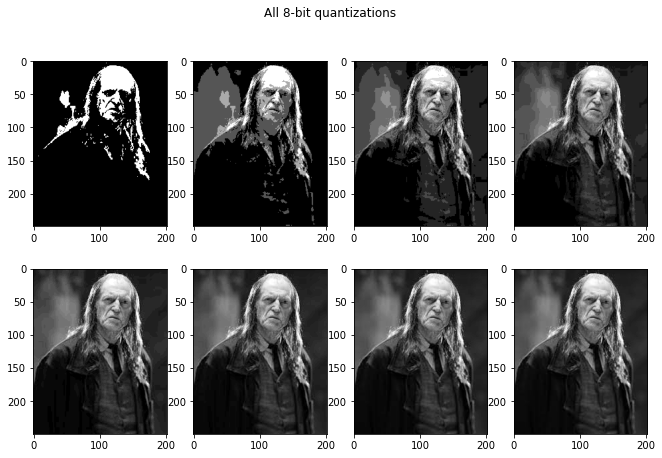

In [6]:
filch = cv2.imread('../images/filch.jpg')
filch = cv2.cvtColor(filch,cv2.COLOR_BGR2GRAY) 

filch_1 = bitQuantizeImage(filch,1)
filch_2 = bitQuantizeImage(filch,2)
filch_3 = bitQuantizeImage(filch,3)
filch_4 = bitQuantizeImage(filch,4)
filch_5 = bitQuantizeImage(filch,5)
filch_6 = bitQuantizeImage(filch,6)
filch_7 = bitQuantizeImage(filch,7)
filch_8 = bitQuantizeImage(filch,8)


fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4,figsize=(11, 7))
fig.suptitle('All 8-bit quantizations')
ax1.imshow(filch_1,cmap="gray")
ax2.imshow(filch_2,cmap="gray")
ax3.imshow(filch_3,cmap="gray")
ax4.imshow(filch_4,cmap="gray")
ax5.imshow(filch_5,cmap="gray")
ax6.imshow(filch_6,cmap="gray")
ax7.imshow(filch_7,cmap="gray")
ax8.imshow(filch_8,cmap="gray")


### Part 3

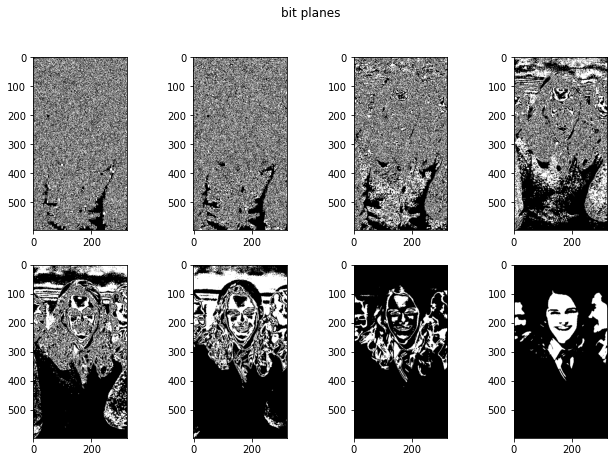

In [7]:
her = cv2.imread('../images/hermoine.jpg')
her = cv2.cvtColor(her,cv2.COLOR_BGR2GRAY)

bit_1 = []
bit_2 = []
bit_3 = []
bit_4 = []
bit_5 = []
bit_6 = []
bit_7 = []
bit_8 = []

for i in range(her.shape[0]):
    bit_1.append([])
    bit_2.append([])
    bit_3.append([])
    bit_4.append([])
    bit_5.append([])
    bit_6.append([])
    bit_7.append([])
    bit_8.append([])
    for j in range(her.shape[1]):
        bit_1[i].append(0)
        bit_2[i].append(0)
        bit_3[i].append(0)
        bit_4[i].append(0)
        bit_5[i].append(0)
        bit_6[i].append(0)
        bit_7[i].append(0)
        bit_8[i].append(0)
        if her[i][j]&1 :
            bit_1[i][j] = 1
        else:
            bit_1[i][j] = 0
        if her[i][j]&2 :
            bit_2[i][j] = 1
        else:
            bit_2[i][j] = 0
        if her[i][j]&4 :
            bit_3[i][j] = 1
        else:
            bit_3[i][j] = 0
        if her[i][j]&8 :
            bit_4[i][j] = 1
        else:
            bit_4[i][j] = 0
        if her[i][j]&16:
            bit_5[i][j] = 1
        else:
            bit_5[i][j] = 0
        if her[i][j]&32 :
            bit_6[i][j] = 1
        else:
            bit_6[i][j] = 0
        if her[i][j]&64:
            bit_7[i][j] = 1
        else:
            bit_7[i][j] = 0
        if her[i][j]&128:
            bit_8[i][j] = 1
        else:
            bit_8[i][j] = 0

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4,figsize=(11, 7))
fig.suptitle('bit planes')
ax1.imshow(bit_1,cmap="gray")
ax2.imshow(bit_2,cmap="gray")
ax3.imshow(bit_3,cmap="gray")
ax4.imshow(bit_4,cmap="gray")
ax5.imshow(bit_5,cmap="gray")
ax6.imshow(bit_6,cmap="gray")
ax7.imshow(bit_7,cmap="gray")
ax8.imshow(bit_8,cmap="gray")

### Part 4

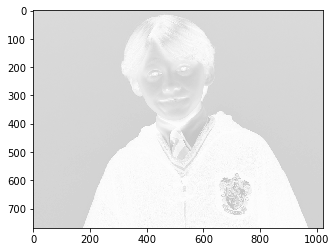

In [8]:
ron = cv2.imread('../images/ron.jpg')
ron = cv2.cvtColor(ron,cv2.COLOR_BGR2GRAY)
neg = 255 - ron
ron_cor = np.array(neg)


#quantized and shifted forward
ron_cor = bitQuantizeImage(neg,6)
ron_cor = np.array(ron_cor)
ron_cor = (255-64)+ron_cor

plt.imshow(ron_cor,cmap='gray', vmin = 0, vmax = 255,interpolation='none')


## Q5
### Part 1

In [9]:
def linContrastStretching(im,a,b):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for c in range(im.shape[2]):
                im[i][j][c] = a + im[i][j][c]*((b-a)/112)
    return im

### Part 2

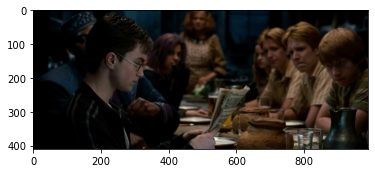

In [10]:
bad = cv2.imread('../images/phoenix-bad.jpg')
bad = cv2.cvtColor(bad,cv2.COLOR_BGR2RGB)
improved = np.copy(bad)
improved = linContrastStretching(improved,0,255)

plt.imshow(improved)

### Part 3

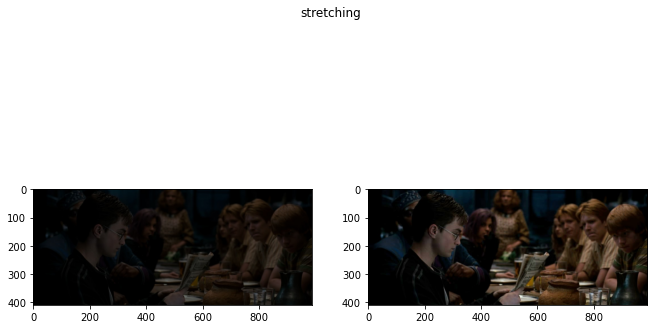

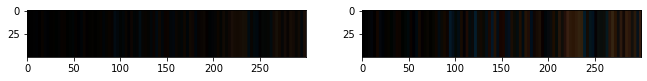

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11, 7))
fig.suptitle('stretching')
ax1.imshow(bad)
ax2.imshow(improved)
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.shape[0]
    for idx, centers in enumerate(clusters): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette  

def Bar(image,k,index):
    image=np.reshape(image,(-1,3))
    unique_elements, frequency = np.unique(image,axis=0, return_counts=True)
    sorted_indexes = np.argsort(frequency)[::-1]
    sorted_by_freq = unique_elements[sorted_indexes]
    bar=palette(sorted_by_freq[:k])
    fig.add_subplot(rows, columns, index)
    index+=1
    plt.imshow(bar)


fig = plt.figure(figsize=(11, 7))
rows,columns=2,2
Bar(bad,100,1)
Bar(improved,100,2)

#### Contrast Stretching : 
- As the internsity histogram for the low light image does not have very spread out values, the image image looks dark. As we apply contrast stretching the image now has values in lower ranges as well as upper ranges, hence the contrast of the image is improved.  
- The 100 (k=100) most frequent colors in both images is shown in the color bar, in the first image most of them are very dark colors, which tells us that most of the histogram is shifted towards the darker colors.
- After spreading the pixels among more lighter colors, by applying linear contrast stretching, lighter colors become more frequent and they can be seen on the right side of the bar for second image.

## Q6
### Part 1

In [12]:
def piecewiseLinearTransform(real,im,k1,k2,a,b):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if (real[i][j]>=a and real[i][j]<=b):
                im[i][j] = int(k1*im[i][j] + k2)

### Part 2

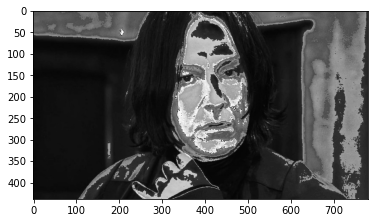

In [13]:
snape = cv2.imread('../images/snape1.jpg')
snape = cv2.cvtColor(snape,cv2.COLOR_BGR2GRAY)
rs = np.copy(snape)
piecewiseLinearTransform(rs,snape,1,0,0,0.2*255)
piecewiseLinearTransform(rs,snape,-2,0.6,0.2*255,0.3*255)
piecewiseLinearTransform(rs,snape,1,-0.3,0.3*255,0.5*255)
piecewiseLinearTransform(rs,snape,-2,1.2,0.5*255,0.6*255)
piecewiseLinearTransform(rs,snape,1,-0.6,0.6*255,0.8*255)
piecewiseLinearTransform(rs,snape,-1,1,0.8*255,1*255)
plt.imshow(snape,cmap='gray')

### Part 3

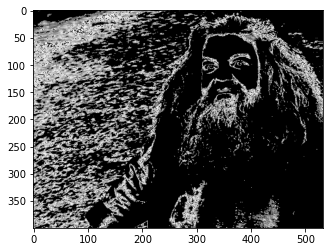

In [14]:
hagrid = cv2.imread('../images/hagrid.jpg')
hagrid = cv2.cvtColor(hagrid,cv2.COLOR_BGR2GRAY)
hs = np.copy(hagrid)
piecewiseLinearTransform(hs,hagrid, 0, 0, 0, 0.1*255)
piecewiseLinearTransform(hs,hagrid,0, 0.2, 0.1*255, 0.2*255)
piecewiseLinearTransform(hs,hagrid,6.5, -1.1, 0.2*255, 0.3*255)
piecewiseLinearTransform(hs,hagrid,-6.5,2.8,0.3*255,0.4*255)
piecewiseLinearTransform(hs,hagrid,0,0.2,0.4*255,0.5*255)
piecewiseLinearTransform(hs,hagrid,0,0,0.5*255,255)
plt.imshow(hagrid,cmap='gray')

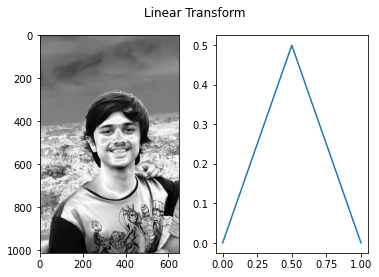

In [15]:
k = cv2.imread('../images/kushal.jpeg')
k = cv2.cvtColor(k,cv2.COLOR_BGR2GRAY)
rk = np.copy(k)
piecewiseLinearTransform(rk,k, 1, 0, 0, 0.5*255)
piecewiseLinearTransform(rk,k,-1, 1, 0.5*255, 1*255)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Linear Transform')
ax1.imshow(k,cmap='gray')
ax2.plot([0,0.5,1],[0,0.5,0])

#### Explanation : 

- Analyze the graph for the piecewise function that we need to use
- We divide the graph into straight line intervals
- Identify the start and endpoints of each of the these intervals
- Using these points find out the equation of the line ` y = mx + c ` 
- Now we know our k1=m,k2=c for that particular interval
- These are then passed into our linear transform function along with the image
- Outputs of all the intervals are combined and final image is plotted

## Q7
## part 1

In [16]:

def histEqualization(image):
    hist=np.zeros(256)
    a=np.zeros(hist.shape)
    a[0]=hist[0]
    image=np.asarray(image)
    for i in image:
        hist[i]+=1
    flat_img=image.flatten()   
    for i in range(1,hist.shape[0]):
        a[i]=a[i-1]+hist[i]
        
    a = (a-a.min())*255/(a.max()-a.min())
    pixels={}
    for i in range(0,256):
        pixels[i]=(a[i]-a.min())*255/(a.max()-a.min())
    out=a[flat_img]
    out=np.reshape(out,image.shape)
    return out,pixels


### Part 2

(0.0, 256.0, 0.0, 60000.0)

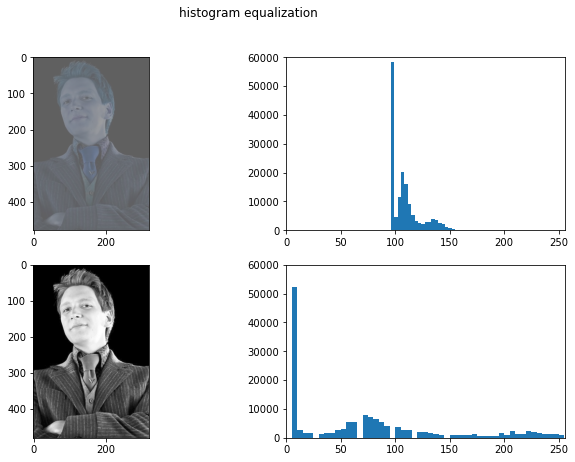

In [17]:
fred = cv2.imread('../images/fred.jpeg')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11, 7))
fig.suptitle('histogram equalization')
ax1.imshow(fred)
fred = cv2.cvtColor(fred,cv2.COLOR_BGR2GRAY)

#apply equalization and make histograms
frednew,old_hist = histEqualization(fred)

    
#plot results
weightList=fred.flatten()
weightList.sort()
ax2.hist(weightList, bins=20) 
ax2.axis([0, 256,0,60000]) 

ax3.imshow(frednew,cmap='gray')
weightList=frednew.flatten()
weightList.sort()
ax4.hist(weightList, bins=50) 
ax4.axis([0, 256,0,60000]) 





#### Observartions : 
- We can see that the histogram of the new image is more spread out and takes broader range of intensities
- we see that the contrast of the image has imrpoved.

### Part 3 & 4

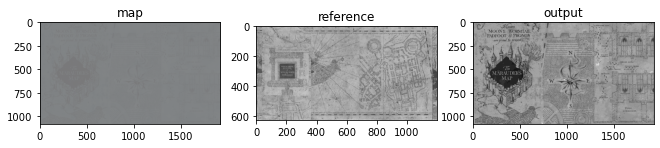

In [18]:
def histmatch(image,reference):
    temp,map1=histEqualization(np.copy(image))
    temp,map2=histEqualization(np.copy(reference))
    new_image=np.copy(image)
    for i in map1:
        map1[i]=int(min(map2.items(), key=lambda x: abs(map1[i] - x[1]))[0])

    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            new_image[i][j]=map1[new_image[i][j]]

    return new_image
    
map1 = cv2.imread('../images/map.jpeg')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(11, 7))
ax1.imshow(map1,cmap='gray')
ax1.title.set_text("map")
map1 = cv2.cvtColor(map1,cv2.COLOR_BGR2GRAY)
ref = cv2.imread('../images/map-reference.jpeg')
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

map2 = histmatch(map1,ref)
ax2.imshow(ref,cmap='gray')
ax3.imshow(map2,cmap='gray')
ax2.title.set_text("reference")

ax3.title.set_text("output")

## Q8
### Part 1

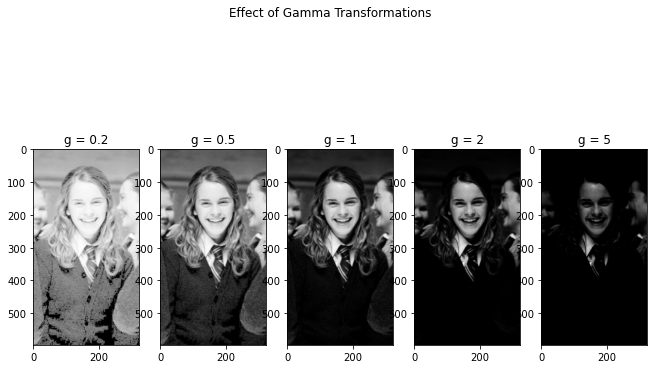

In [19]:
her_again = cv2.imread('../images/hermoine.jpg')
her_again = cv2.cvtColor(her_again,cv2.COLOR_BGR2GRAY)


def gammaTransform(im,gam):
    im2 = np.array(255*(im/255)**gam,dtype='uint8')
    return im2



new1 = gammaTransform(her_again,0.2)
new2 = gammaTransform(her_again,0.5)
new3 = gammaTransform(her_again,2)
new4 = gammaTransform(her_again,5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(11, 7))
fig.suptitle('Effect of Gamma Transformations')
ax1.imshow(new1,cmap="gray")
ax1.set_title('g = 0.2')
ax2.set_title('g = 0.5')
ax3.set_title('g = 1')
ax4.set_title('g = 2')
ax5.set_title('g = 5')
ax2.imshow(new2,cmap="gray")
ax3.imshow(her,cmap="gray")
ax4.imshow(new3,cmap="gray")
ax5.imshow(new4,cmap="gray")


#### For gamma > 1 : 
We can observe that the intensity of pixels decreases i.e. the image becomes darker.
#### For Gamma < 1 : 
We can observe that the intensity of pixels increases i.e. the image becomes lighter.

### Part 2

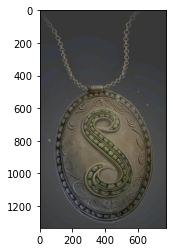

In [20]:
lock = cv2.imread('../images/locket.jpeg')
lock = cv2.cvtColor(lock,cv2.COLOR_BGR2RGB)
lock_n = np.array(255*(lock/255)**0.4,dtype='uint8')
plt.imshow(lock_n)

- We can see that the brightness of the image has increased significantly as the gamma is less than 1 (gamma = 0.4)

### Part 3

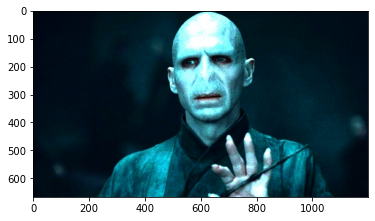

In [21]:
vold = cv2.imread('../images/voldemort.jpeg')
vold = cv2.cvtColor(vold,cv2.COLOR_BGR2RGB)
lock_n = np.array(255*(vold/255)**2,dtype='uint8')
plt.imshow(lock_n)

- We can see that the brightness of the image has decreased significantly as the gamma is grater than 1 (gamma = 2)

### Q9

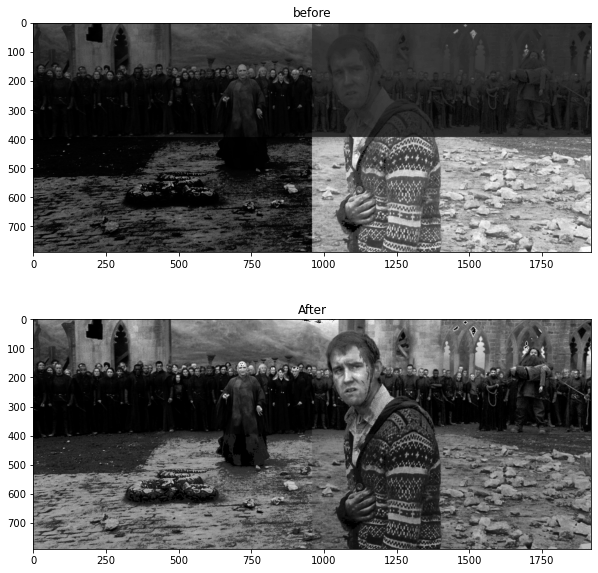

In [22]:
n1 = cv2.imread('../images/neville1.jpg')
n1 = cv2.cvtColor(n1,cv2.COLOR_BGR2GRAY)
n2 = cv2.imread('../images/neville2.jpg')
n2 = cv2.cvtColor(n2,cv2.COLOR_BGR2GRAY)
n3 = cv2.imread('../images/neville3.jpg')
n3 = cv2.cvtColor(n3,cv2.COLOR_BGR2GRAY)
n4 = cv2.imread('../images/neville4.jpg')
n4 = cv2.cvtColor(n4,cv2.COLOR_BGR2GRAY)


initial=cv2.vconcat([cv2.hconcat([n1,n3]),cv2.hconcat([n2,n4])])
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))
ax1.imshow(initial,cmap='gray')
ax1.title.set_text("before")

n1 = cv2.imread('../images/neville1.jpg')
n1=linContrastStretching(np.copy(n1),0,255)
n1 = cv2.cvtColor(n1,cv2.COLOR_BGR2GRAY)
n2 = cv2.imread('../images/neville2.jpg')
n2 = cv2.cvtColor(n2,cv2.COLOR_BGR2GRAY)
n3 = cv2.imread('../images/neville3.jpg')
n3=linContrastStretching(np.copy(n3),0,255)

n3 = cv2.cvtColor(n3,cv2.COLOR_BGR2GRAY)
n4 = cv2.imread('../images/neville4.jpg')
n4 = cv2.cvtColor(n4,cv2.COLOR_BGR2GRAY)

#
n3,pix=histEqualization(np.copy(n3))


# n3=bitQuantizeImage(np.copy(n3),2)
n3=gammaTransform(np.copy(n3),2.6)
n1=gammaTransform(np.copy(n1),1.2)
# n3 = histmatch(np.copy(n3),np.copy(n2))
n4=gammaTransform(np.copy(n4),1.6)
n2=gammaTransform(np.copy(n2),0.4)

final=cv2.vconcat([cv2.hconcat([n1,n3]),cv2.hconcat([n2,n4])])
ax2.imshow(final,cmap='gray')
ax2.title.set_text("After")
